<a href="https://colab.research.google.com/github/AlexandraZambrano/2B-Planned-TodoListApp/blob/main/kiva_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalamos el paquete "**missingno**" que nos ayuda a crear un gráfico donde ver de forma visual los datos faltantes en nuestro dataset

In [1]:
# Instalación silenciosa de missingno
# (No muestra output)
%%capture
!pip install missingno

# Importanmos las librerías necesarias para realizar nuestro procesamiento y limpieza de datos

In [2]:
# Importamos las librerías esenciales
import pandas as pd  # Para manejo de datos
import numpy as np   # Para operaciones numéricas
import plotly as pl  # Para visualizaciones interactivas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes

# Cargamos el dataset de kiva_loans.csv para trabajar


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargamos nuestro dataset principal
# df = pd.read_csv('kiva_loans.csv')
df = pd.read_csv('/content/drive/MyDrive/datasets/kiva_loans.csv')

In [5]:
# Aseguramos que sea DataFrame
df = pd.DataFrame(df)

In [6]:
# Echamos un vistazo a las primeras 20 filas
df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01


# Estadística descriptiva

In [7]:
# Vemos la forma del dataset (filas, columnas)
df.shape

(671205, 20)

In [8]:
# Información general del dataset
# Tipos de datos, nulos, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [9]:
# Contamos valores no nulos por columna
df.count()

,0
id,671205
funded_amount,671205
loan_amount,671205
activity,671205
sector,671205
use,666973
country_code,671197
country,671205
region,614405
currency,671205


In [10]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [11]:
# Buscamos duplicados
df.duplicated().sum()

np.int64(0)

# ¿Hay valores nulos?

In [12]:
# Contamos nulos por columna, ordenados de mayor a menor
df.isna().sum().sort_values(ascending=False)

,0
tags,171416
region,56800
funded_time,48331
partner_id,13507
use,4232
borrower_genders,4221
disbursed_time,2396
country_code,8
activity,0
loan_amount,0


# ¿Son más del 25%?

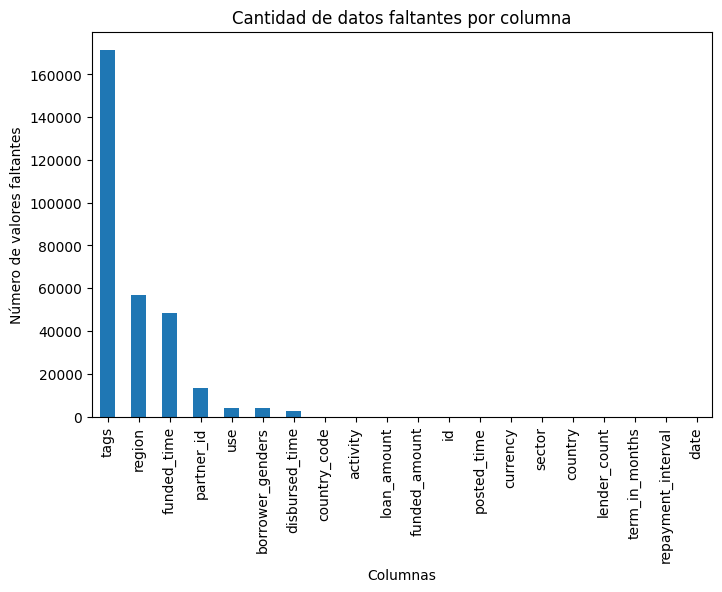

In [13]:
# Verificamos si los nulos superan el 25%

import matplotlib.pyplot as plt

# calcular % de nulos
missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
missing.plot(kind='bar')
plt.title("Cantidad de datos faltantes por columna")
plt.ylabel("Número de valores faltantes")
plt.xlabel("Columnas")
plt.show()

In [14]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct)

tags                  25.538546
region                 8.462392
funded_time            7.200632
partner_id             2.012351
use                    0.630508
borrower_genders       0.628869
disbursed_time         0.356970
country_code           0.001192
activity               0.000000
loan_amount            0.000000
funded_amount          0.000000
id                     0.000000
posted_time            0.000000
currency               0.000000
sector                 0.000000
country                0.000000
lender_count           0.000000
term_in_months         0.000000
repayment_interval     0.000000
date                   0.000000
dtype: float64


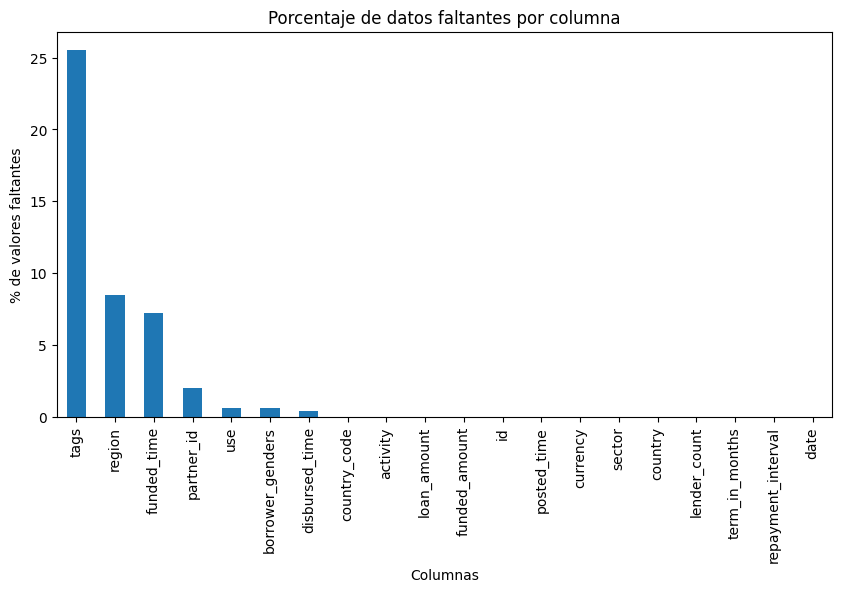

In [15]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(10,5))
missing_pct.plot(kind='bar')
plt.title("Porcentaje de datos faltantes por columna")
plt.ylabel("% de valores faltantes")
plt.xlabel("Columnas")
plt.show()

# la columna tags tiene muchos valores faltantes, debería borrarla porque no aporta información de valor

<Axes: >

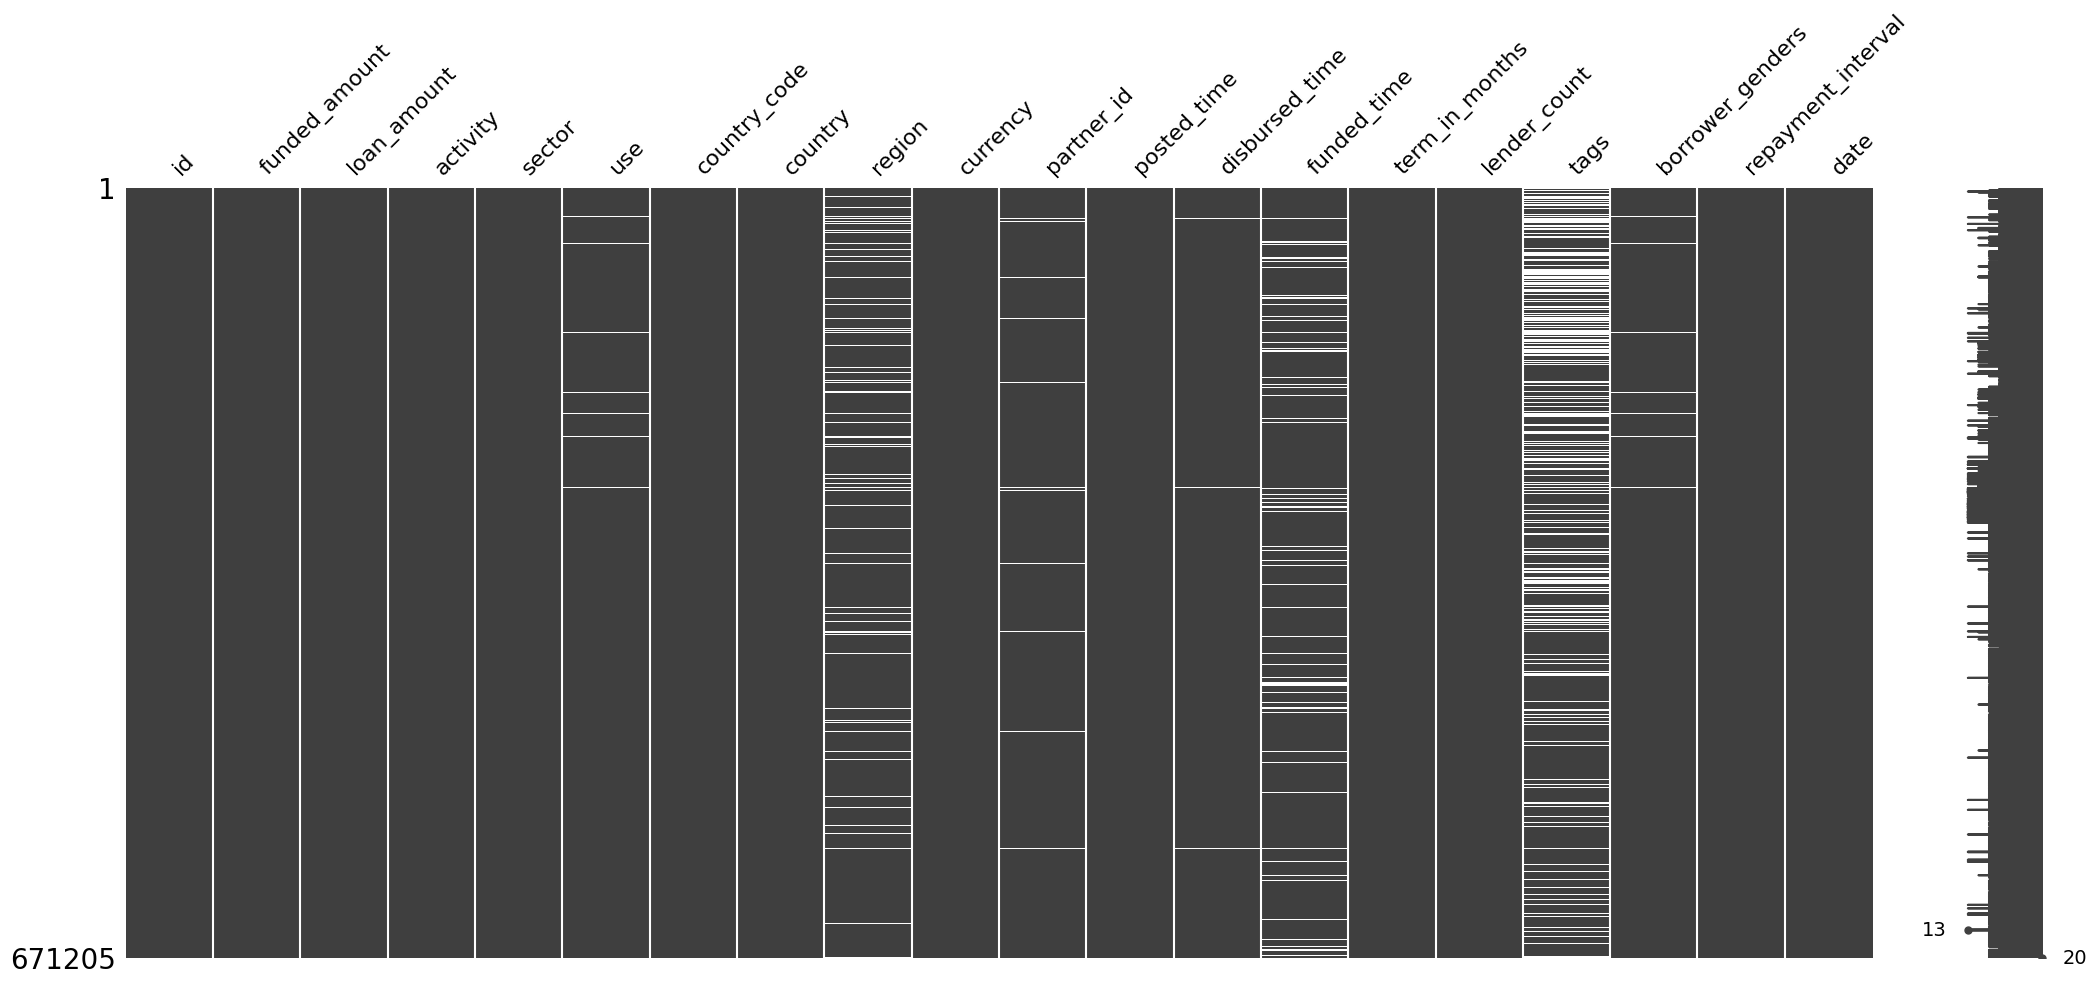

In [16]:
msno.matrix(df)

<Axes: >

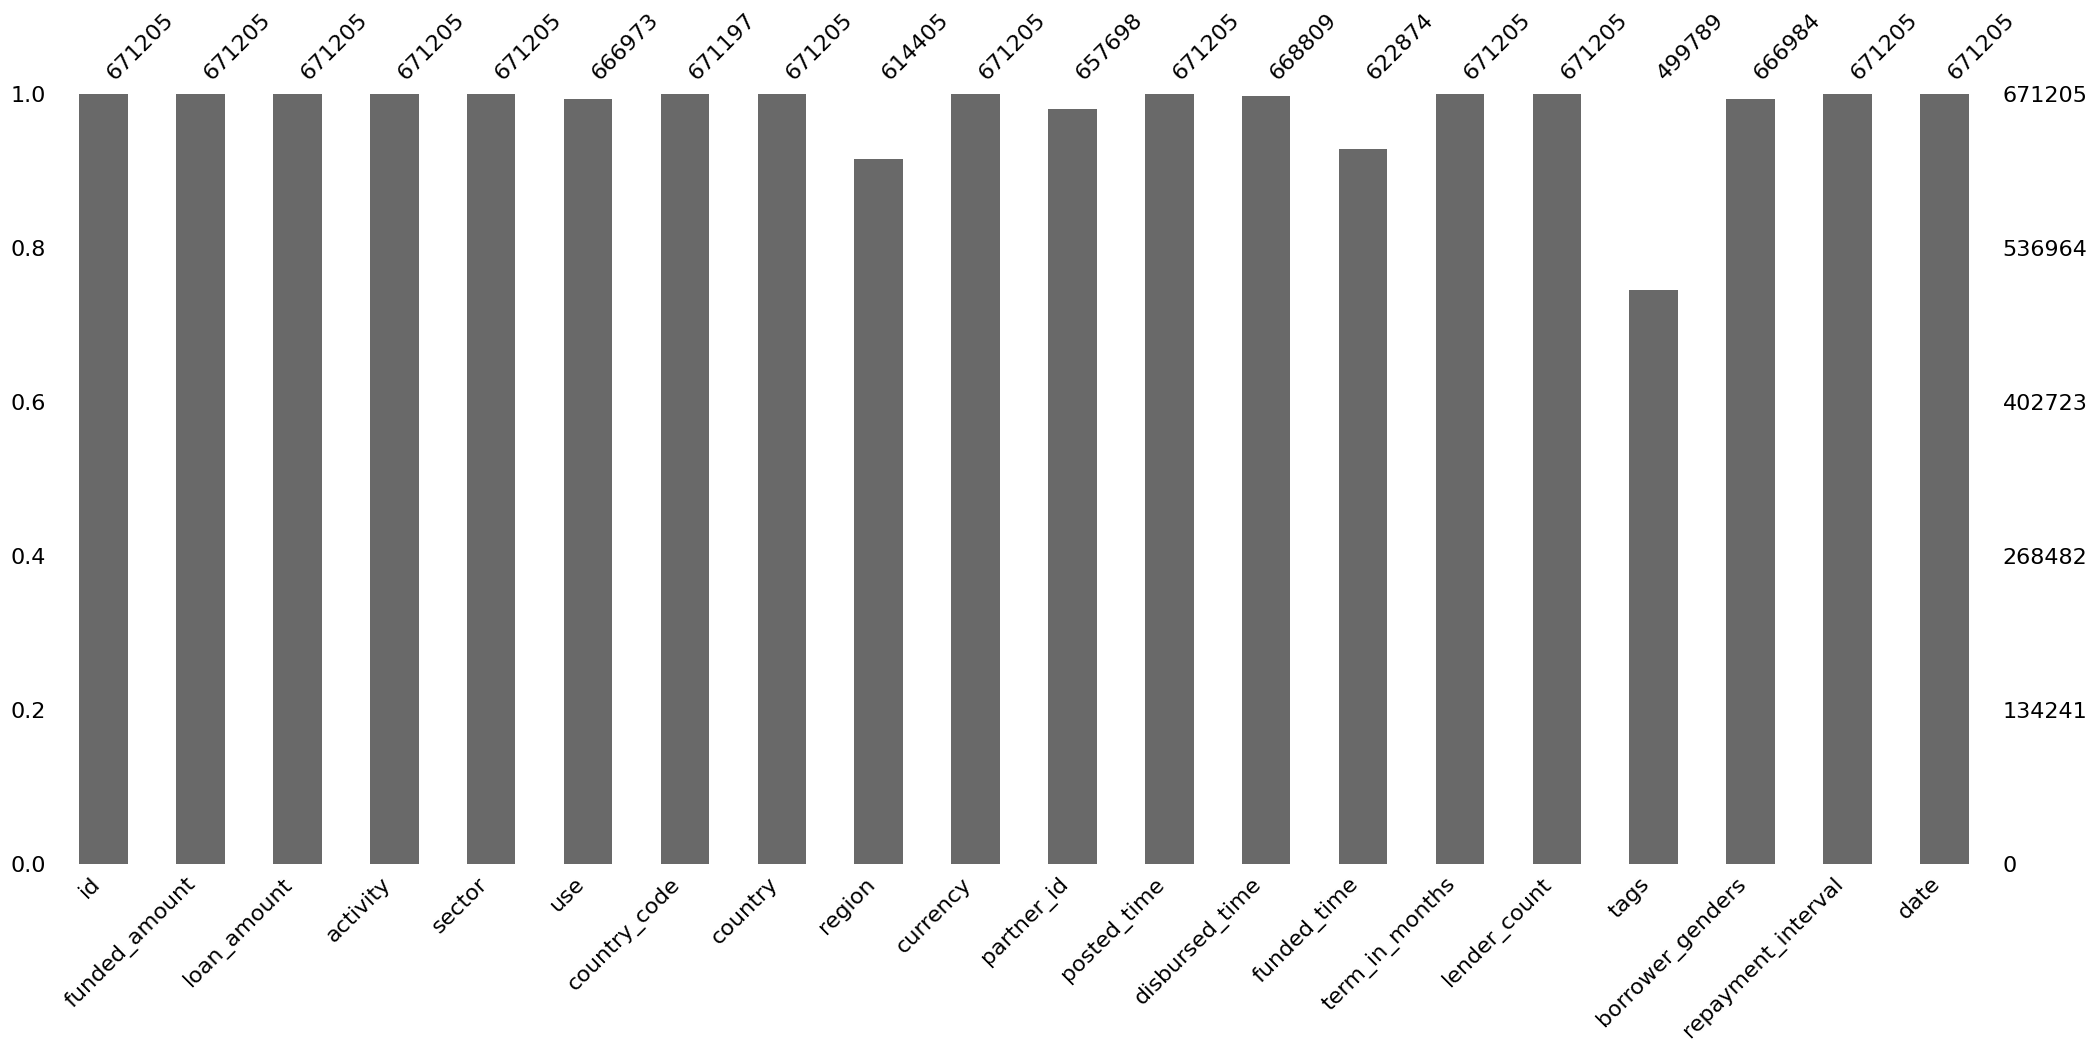

In [17]:
msno.bar(df)

# Creamos una copia del dataset original para aplicarle cambios importantes como borrar columnas, cambiar tipos de datos, etc

In [18]:
kiva_loans_df = df.copy()

# Borraremos las columnas que no nos aportan mucha información o información de valor, en este caso borraremos las columnas parthner_id, country_code, tags, borrower_genders y date

In [19]:
'''
Borramos 'country_code' porque es redundante ya que hay una columna 'country',
Borramos 'tags' porque al tener tantos valores faltantes no nos aporta información de valor,
Borramos 'partnet_id' porque no es una información que nos provea mucho valor,
Borramos 'borrower_genders' porque no es una información que nos provea mucho valor,
Borramos 'date' porque la columna 'posted_time' ya nos devuelve el mismo valor,
'''
cols_to_drop = ['country_code', 'tags', 'partner_id', 'borrower_genders', 'date', 'funded_time', 'region', 'use' ]
for col in cols_to_drop:
    if col in kiva_loans_df.columns:
        kiva_loans_df = kiva_loans_df.drop(columns=col)

# Vemos que ahora tenemos 12 columnas y no 20

In [20]:
kiva_loans_df.shape

(671205, 12)

In [21]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,PKR,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,PKR,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,14.0,16,monthly


In [22]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   country             671205 non-null  object 
 6   currency            671205 non-null  object 
 7   posted_time         671205 non-null  object 
 8   disbursed_time      668809 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 61.5+ MB


# Tomamos las columnas de fecha y les definimos el tipo de dato "**datetime**"

In [23]:
# Convertir a datetime las fechas
kiva_loans_df["posted_time"] = pd.to_datetime(kiva_loans_df["posted_time"], errors="coerce")
kiva_loans_df["disbursed_time"] = pd.to_datetime(kiva_loans_df["disbursed_time"], errors="coerce")

# Normalizar a la fecha (eliminar la la hora, estableciéndola en medianoche) manteniendo el tipo datetime
kiva_loans_df["posted_time"] = kiva_loans_df["posted_time"].dt.normalize()
kiva_loans_df["disbursed_time"] = kiva_loans_df["disbursed_time"].dt.normalize()


In [24]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   country             671205 non-null  object             
 6   currency            671205 non-null  object             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  datetime64[ns, UTC]
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  object             
dtypes: datetime64[ns

In [25]:
kiva_loans_df.head(3)

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet


# Tomamos las columnas de tipo de dato "**object**" y les definimos el tipo de dato "**string**"

In [26]:
for col in kiva_loans_df.columns:
    if kiva_loans_df[col].dtype == 'object':
        kiva_loans_df[col] = kiva_loans_df[col].astype('string')

# Verificamos nuevamente el tipo de datos de las columnas

In [27]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  string             
 4   sector              671205 non-null  string             
 5   country             671205 non-null  string             
 6   currency            671205 non-null  string             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  datetime64[ns, UTC]
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  string             
dtypes: datetime64[ns

# Nos aseguramos que los datos de tipo "str" no tengan espacios innecesarios y que estén escritas en minúscula

In [28]:
def clean_text(columna_texto):
    return columna_texto.astype(str).str.strip().str.lower()

for col in kiva_loans_df.columns:
    if kiva_loans_df[col].dtype == 'string':
        kiva_loans_df[col] = clean_text(kiva_loans_df[col])

# Clasificación de préstamos según la fecha de desembolso
 Creamos la columna `loan_type` para saber si un préstamo fue desembolsado
 antes o después de la fecha de publicación:
- "pre_disbursed": el préstamo se desembolsó **antes** de publicarse (disbursed_time < posted_time)
- "post_disbursed": el préstamo se desembolsó **después** de publicarse (disbursed_time >= posted_time)

In [29]:
kiva_loans_df["loan_type"] = np.where(
    kiva_loans_df["disbursed_time"] < kiva_loans_df["posted_time"],
    "pre_disbursed",
    "post_disbursed"
)

In [30]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed


In [31]:
post_disbursed_loans = kiva_loans_df[kiva_loans_df["loan_type"] == "post_disbursed"]

In [32]:
post_disbursed_loans.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type
5,1080148,250.0,250.0,services,services,kenya,kes,2014-01-01 00:00:00+00:00,2014-01-30 00:00:00+00:00,4.0,6,irregular,post_disbursed
62,653290,4275.0,4275.0,personal housing expenses,housing,vietnam,vnd,2014-01-02 00:00:00+00:00,2014-01-27 00:00:00+00:00,14.0,144,bullet,post_disbursed
67,1080150,125.0,125.0,energy,services,kenya,kes,2014-01-02 00:00:00+00:00,2014-01-30 00:00:00+00:00,3.0,6,irregular,post_disbursed
99,1080153,5000.0,5000.0,food production/sales,food,united states,usd,2014-01-02 00:00:00+00:00,2014-03-10 00:00:00+00:00,30.0,261,monthly,post_disbursed
114,1080151,125.0,125.0,energy,services,kenya,kes,2014-01-02 00:00:00+00:00,2014-01-30 00:00:00+00:00,3.0,7,irregular,post_disbursed


# Creamos una nueva columna 'loan_amount' para clasificar si el prestamo es muy pequeño, pequeño, mediano o grande

In [33]:
kiva_loans_df.describe()

,id,funded_amount,loan_amount,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,158.000000,2986.000000


In [34]:
# Obtener min y max reales
min_val = kiva_loans_df['loan_amount'].min()
max_val = kiva_loans_df['loan_amount'].max()

# Definir límites según los rangos
bins = [
    min_val,     # mínimo real
    500,
    2500,
    10000,
    max_val      # máximo real
]

labels = ['micro', 'small', 'medium', 'large']

kiva_loans_df['loan_amount_category'] = pd.cut(kiva_loans_df['loan_amount'],
                                               bins=bins, labels=labels, right=False)

# Ver resumen
print(kiva_loans_df['loan_amount_category'].value_counts())
print("Min:", min_val, "Max:", max_val)

loan_amount_category
micro     330534
small     299111
medium     40144
large       1415
Name: count, dtype: int64
Min: 25.0 Max: 100000.0


In [35]:
kiva_loans_df.shape

(671205, 14)

In [36]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type,loan_amount_category
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed,micro
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed,small
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed,micro
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed,micro
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed,micro


# Visualicemos la información que hemos limpiado

# 💡 Histograma

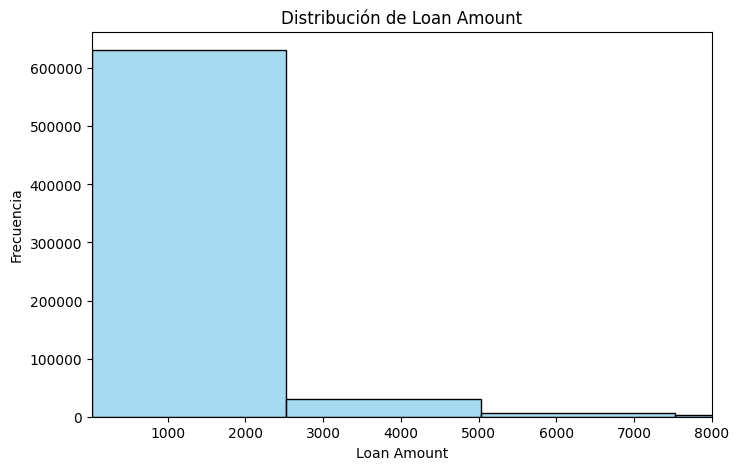

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(kiva_loans_df['loan_amount'], bins=40, kde=False, color='skyblue')
plt.title("Distribución de Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frecuencia")
plt.xlim(25, 8000)
plt.show()

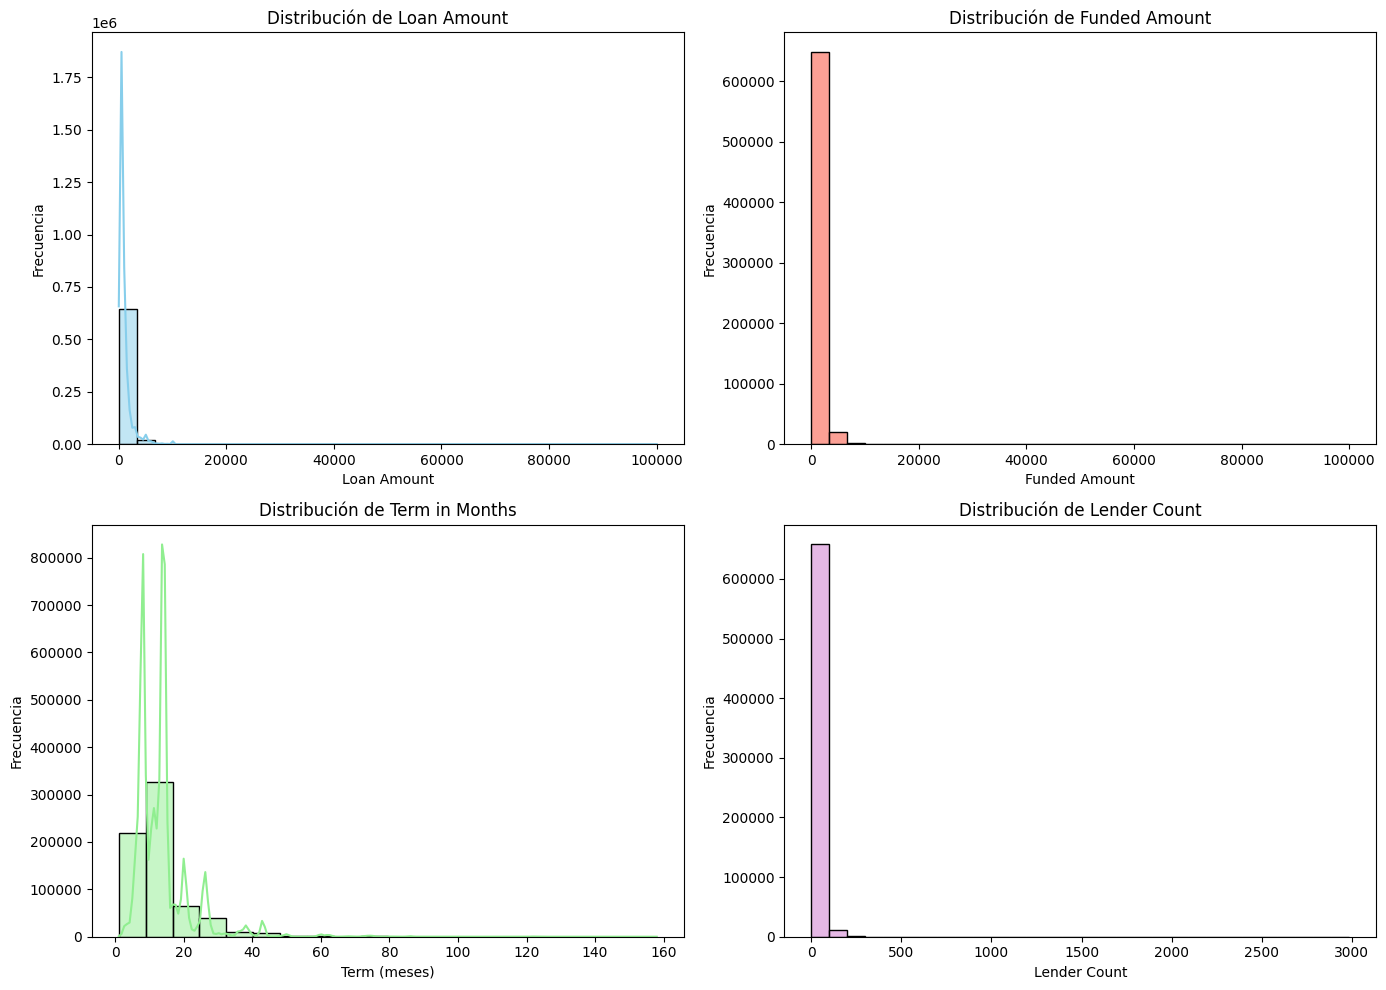

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

# Loan Amount
sns.histplot(df['loan_amount'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de Loan Amount')
axes[0].set_xlabel('Loan Amount')
# axes[0].xlim(25, 8000)
axes[0].set_ylabel('Frecuencia')

# Funded Amount
sns.histplot(df['funded_amount'], bins=30, kde=False, color='salmon', ax=axes[1])
axes[1].set_title('Distribución de Funded Amount')
axes[1].set_xlabel('Funded Amount')
axes[1].set_ylabel('Frecuencia')

# Term in Months
sns.histplot(df['term_in_months'], bins=20, kde=True, color='lightgreen', ax=axes[2])
axes[2].set_title('Distribución de Term in Months')
axes[2].set_xlabel('Term (meses)')
axes[2].set_ylabel('Frecuencia')

# Lender Count
sns.histplot(df['lender_count'], bins=30, kde=False, color='plum', ax=axes[3])
axes[3].set_title('Distribución de Lender Count')
axes[3].set_xlabel('Lender Count')
axes[3].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 💡 Gráfico de barras:

- Para datos discretos como países, sectores, tipos de loan, etc...

Index(['philippines', 'kenya', 'peru', 'paraguay', 'el salvador',
       'united states', 'cambodia', 'bolivia', 'rwanda', 'ecuador'],
      dtype='object', name='country')
[54476375. 32248405. 30394850. 29412700. 23357725. 23158540. 18817100.
 18276200. 15505600. 14598900.]


/tmp/ipython-input-3462624761.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_totals.index, y=country_totals.values, palette='pastel')


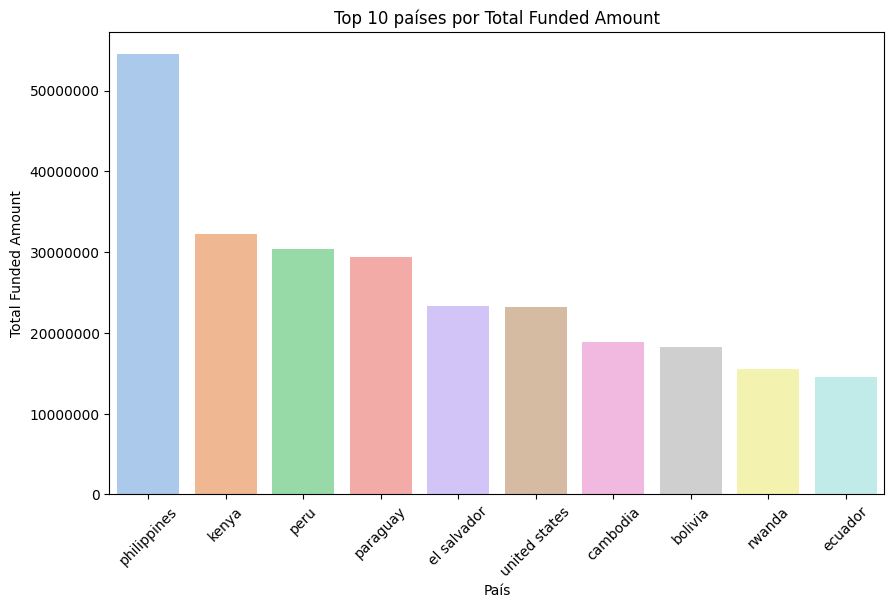

In [39]:
country_totals = kiva_loans_df.groupby('country')['funded_amount'].sum().sort_values(ascending=False).head(10)

print(country_totals.index)
print(country_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=country_totals.index, y=country_totals.values, palette='pastel')
plt.title("Top 10 países por Total Funded Amount")
plt.xlabel("País")
plt.ylabel("Total Funded Amount")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

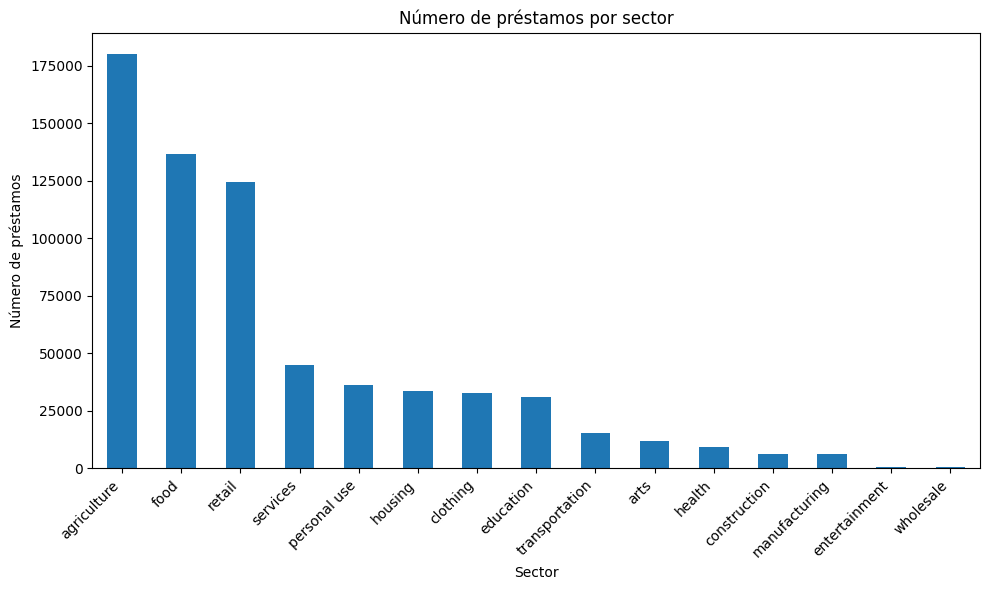

In [40]:
count_by_sector = kiva_loans_df['sector'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
count_by_sector.plot(kind='bar')
plt.title('Número de préstamos por sector')
plt.xlabel('Sector')
plt.ylabel('Número de préstamos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type,loan_amount_category
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed,micro
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed,small
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed,micro
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed,micro
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed,micro


/tmp/ipython-input-3603540527.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_type', y='lender_count', data=agg, palette='viridis')


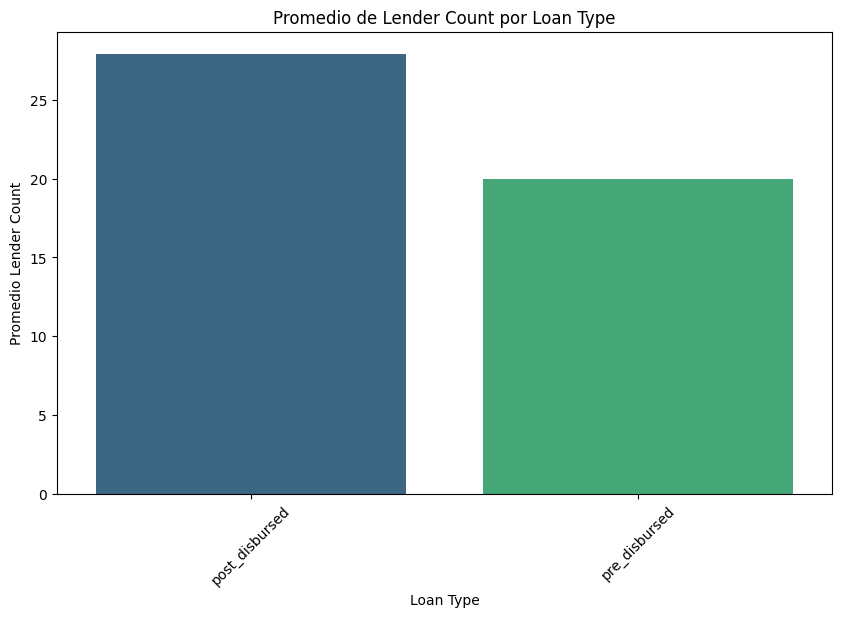

In [42]:
# Agrupar por loan_type y calcular promedio de lender_count
agg = kiva_loans_df.groupby('loan_type')['lender_count'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='loan_type', y='lender_count', data=agg, palette='viridis')
plt.title("Promedio de Lender Count por Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Promedio Lender Count")
plt.xticks(rotation=45)
plt.show()

# 💡 Gráfico de líneas:

/tmp/ipython-input-2525365824.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  kiva_loans_df['month'] = kiva_loans_df['posted_time'].dt.to_period('M')


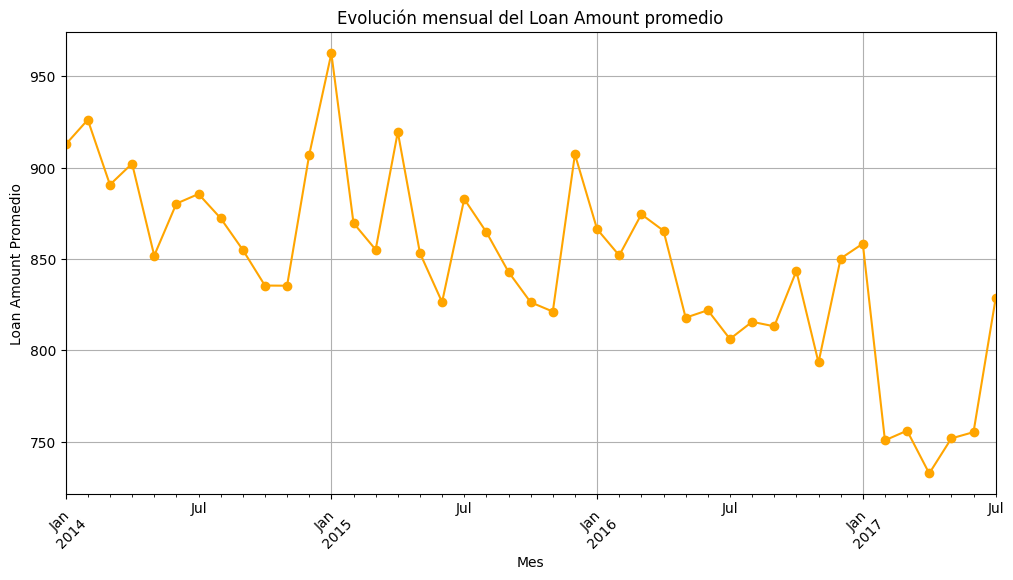

In [43]:
kiva_loans_df['month'] = kiva_loans_df['posted_time'].dt.to_period('M')
monthly_avg = kiva_loans_df.groupby('month')['loan_amount'].mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual del Loan Amount promedio")
plt.xlabel("Mes")
plt.ylabel("Loan Amount Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Tendencia estacional

In [44]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type,loan_amount_category,month
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed,micro,2014-01
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed,small,2014-01
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed,micro,2014-01
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed,micro,2014-01
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed,micro,2014-01


/tmp/ipython-input-3924548892.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kiva_loans_df_line = kiva_loans_df.groupby(pd.Grouper(key='posted_time', freq='M')).agg({'funded_amount': 'sum'}).reset_index()


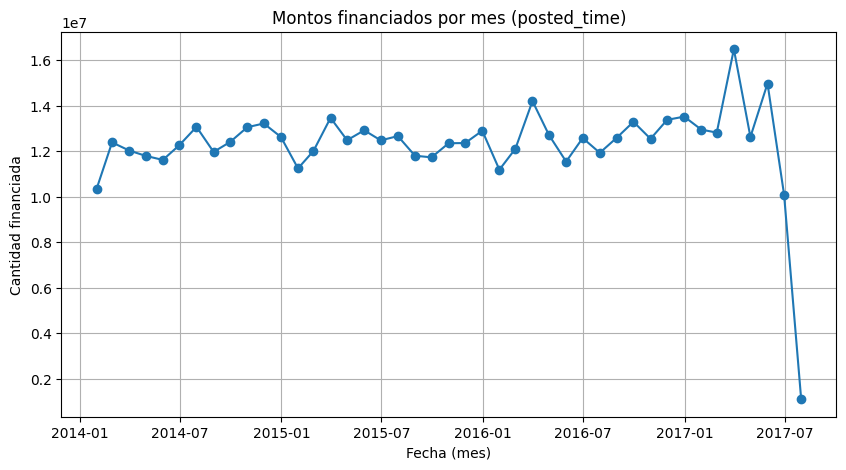

In [45]:
# Asegúrate de que las fechas sean datetime
kiva_loans_df['posted_time'] = pd.to_datetime(kiva_loans_df['posted_time'], errors='coerce')

# 1) Gráfico de línea temporal
# Por ejemplo, montos financiados por fecha de publicación (podrías agrupar por días / meses)
kiva_loans_df_line = kiva_loans_df.groupby(pd.Grouper(key='posted_time', freq='M')).agg({'funded_amount': 'sum'}).reset_index()

plt.figure(figsize=(10,5))
plt.plot(kiva_loans_df_line['posted_time'], kiva_loans_df_line['funded_amount'], marker='o')
plt.title('Montos financiados por mes (posted_time)')
plt.xlabel('Fecha (mes)')
plt.ylabel('Cantidad financiada')
plt.grid(True)
plt.show()

# 💡 Pie chart

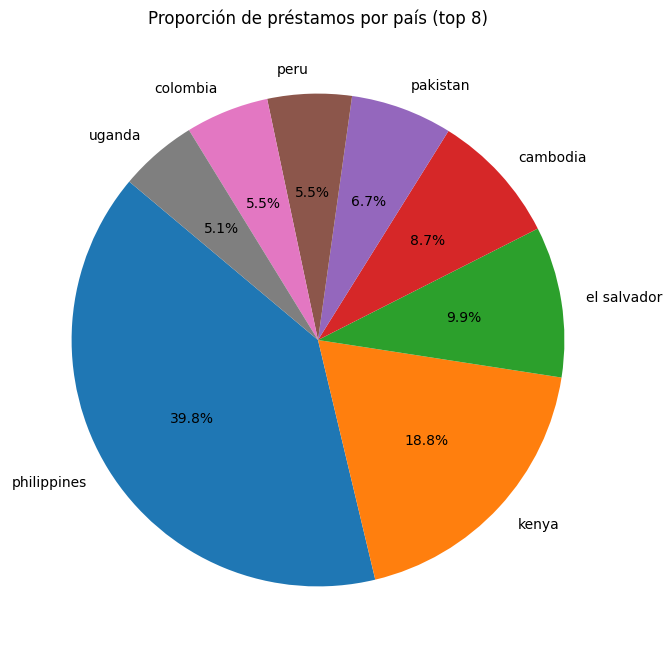

In [46]:
top_countries = kiva_loans_df['country'].value_counts().nlargest(8)
plt.figure(figsize=(8,8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de préstamos por país (top 8)')
plt.show()

# 💡 Choropleth map

In [47]:
%%capture
!pip install geodatasets

In [48]:
import geopandas as gpd
import geodatasets
import os
import requests
import zipfile

In [66]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

La extensión .shp es la parte principal de un Shapefile, un formato de datos de Geoinformática (GIS) popular que almacena la geometría de elementos geográficos como puntos, líneas y polígonos.

In [73]:
drive_base_url = "/content/drive/MyDrive/"

In [74]:
# para descargar este archivo zip, nos diriguimos a, haciendo ctrl + click sobre el link: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
world = gpd.read_file(f"{drive_base_url}/ne_countries/ne_110m_admin_0_countries.shp")
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [65]:
world['NAME']

,NAME
0,Fiji
1,Tanzania
2,W. Sahara
3,Canada
4,United States Of America
...,...
172,Serbia
173,Montenegro
174,Kosovo
175,Trinidad And Tobago


# Revisamos lo que tenemos en nuestra columna 'country' en el dataset

In [68]:
kiva_loans_df['country']

,country
0,Pakistan
1,Pakistan
2,India
3,Pakistan
4,Pakistan
...,...
671200,Paraguay
671201,Kenya
671202,Kenya
671203,Kenya


# Verificamos que el formado de world["NAME"] y kiva_loans_df['country'] sea el mismo

In [50]:
kiva_loans_df["country"] = kiva_loans_df["country"].astype(str).str.title().str.strip()
world["NAME"] = world["NAME"].astype(str).str.title().str.strip()

In [69]:
kiva_loans_df['country']

,country
0,Pakistan
1,Pakistan
2,India
3,Pakistan
4,Pakistan
...,...
671200,Paraguay
671201,Kenya
671202,Kenya
671203,Kenya


In [71]:
country_stats = kiva_loans_df.groupby("country", as_index=False)["loan_amount"].sum()
country_stats = country_stats.rename(columns={"loan_amount": "total_loan"})

print(country_stats.index)
print(country_stats.head())

RangeIndex(start=0, stop=87, step=1)
       country  total_loan
0  Afghanistan     14000.0
1      Albania   2666500.0
2      Armenia  12915400.0
3   Azerbaijan   2888700.0
4       Belize    114025.0


# Hacemos un left join, al dataframe world se le agrega la info del dataframe country_stats cuando coinciden, si hay un país que no existe entonces se marca como NaN

In [52]:
merged = world.merge(country_stats, left_on="NAME", right_on="country", how="left")

<Figure size 2000x2000 with 0 Axes>

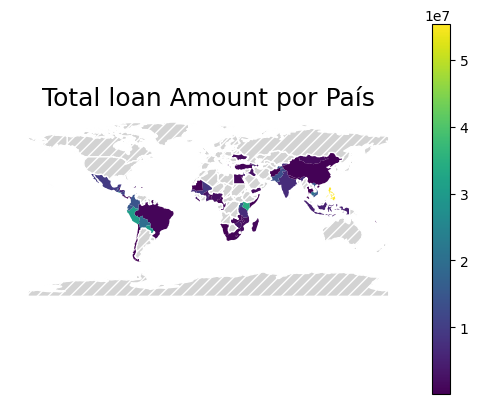

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
merged.plot(
    column="total_loan",
    cmap="viridis",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data"
    }
)

plt.title("Total loan Amount por País", fontsize=18)
plt.axis("off")
plt.show()

In [54]:
import folium

In [75]:
m = folium.Map(location=[20, 0], zoom_start=2)

# Agregar capa GeoJson con información por país
folium.GeoJson(
    merged,
    style_function=lambda feature: {
        'fillColor': '#gray' if feature['properties']['total_loan'] is None else '#3186cc',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'total_loan'],
        aliases=['País:', 'Total Loan:'],
        localize=True,
        sticky=True
    )
).add_to(m)

# vemos el mapa
m

# Verificamos la existencia de outliers (valores atípicos), respecto a las columnas **funded_amount:** y **loan_amount**

💡 **Regla de Tukey:** La Regla de Tukey es una forma sencilla de detectar valores atípicos (outliers) usando cuartiles.
La idea es ver qué tan lejos están los datos de la parte **“normal”** del conjunto.

- Q1 = valor donde termina el 25% más bajo de los datos

- Q3 = valor donde termina el 75% de los datos

- IQR = Q3 − Q1 → mide la zona donde vive la mitad central de los datos

Un dato se considera outlier si está demasiado lejos de esa zona:

- Límite inferior = Q1 − 1.5 × IQR

- Límite superior = Q3 + 1.5 × IQR

Todo lo que quede fuera de ese rango se marca como valor atípico.

** Quién fue Tukey?

John Tukey fue un estadístico estadounidense, pionero en análisis y exploración de datos. Es conocido por inventar el boxplot y acuñar el término bit en informática.

In [79]:
kiva_loans_df['loan_amount_category'].value_counts()

,count
loan_amount_category,
micro,330534
small,299111
medium,40144
large,1415


In [72]:
categories = ["micro", "small", "medium", "large"]

for cat in categories:
    df_cat = kiva_loans_df[kiva_loans_df["loan_amount_category"] == cat]

    if df_cat.empty:
        print(f"\n{cat}: (sin datos)")
        continue

    q1 = df_cat["loan_amount"].quantile(0.25)
    q3 = df_cat["loan_amount"].quantile(0.75)
    iqr = q3 - q1

    # Limites para detectar outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filtrar outliers
    outliers = df_cat[(df_cat["loan_amount"] < lower_bound) | (df_cat["loan_amount"] > upper_bound)]
    n_outliers = len(outliers)

    print(f"\nCategoría: {cat}")
    print(f"  Q1: {q1}")
    print(f"  Q3: {q3}")
    print(f"  IQR: {iqr}")
    print(f"  Outliers: {n_outliers}")


Categoría: micro
  Q1: 200.0
  Q3: 350.0
  IQR: 150.0
  Outliers: 0

Categoría: small
  Q1: 625.0
  Q3: 1200.0
  IQR: 575.0
  Outliers: 10204

Categoría: medium
  Q1: 3000.0
  Q3: 5000.0
  IQR: 2000.0
  Outliers: 797

Categoría: large
  Q1: 10000.0
  Q3: 10000.0
  IQR: 0.0
  Outliers: 183


In [57]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type,loan_amount_category,month
0,653051,300.0,300.0,fruits & vegetables,food,Pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed,micro,2014-01
1,653053,575.0,575.0,rickshaw,transportation,Pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed,small,2014-01
2,653068,150.0,150.0,transportation,transportation,India,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed,micro,2014-01
3,653063,200.0,200.0,embroidery,arts,Pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed,micro,2014-01
4,653084,400.0,400.0,milk sales,food,Pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed,micro,2014-01


# 💡 Gráfico de densidad

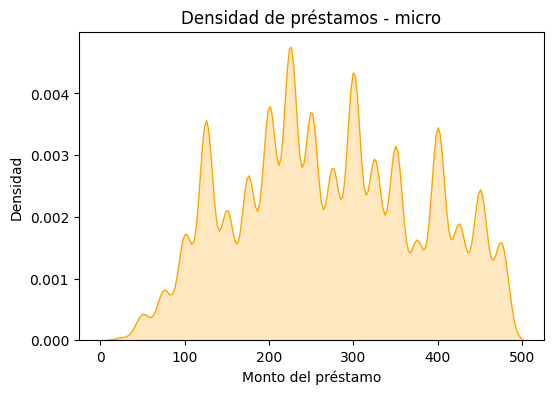

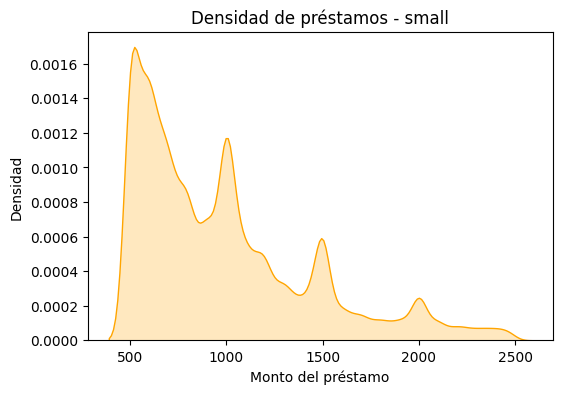

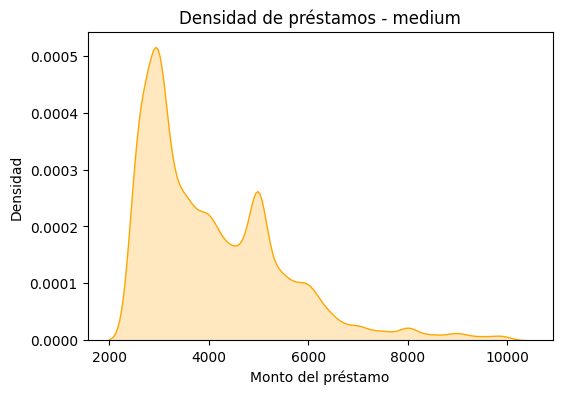

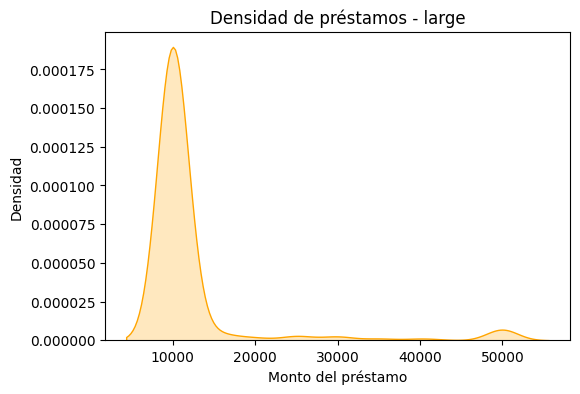

In [80]:
import seaborn as sns

for cat in labels:
    subset = kiva_loans_df[kiva_loans_df['loan_amount_category'] == cat]
    plt.figure(figsize=(6,4))
    sns.kdeplot(subset['loan_amount'], fill=True, color='orange')
    plt.title(f"Densidad de préstamos - {cat}")
    plt.xlabel("Monto del préstamo")
    plt.ylabel("Densidad")
    plt.show()

In [59]:
folder = "/content/drive/MyDrive/datasets"
os.makedirs(folder, exist_ok=True)

kiva_loans_df.to_csv(f"{folder}/df_clean.csv", index=False)

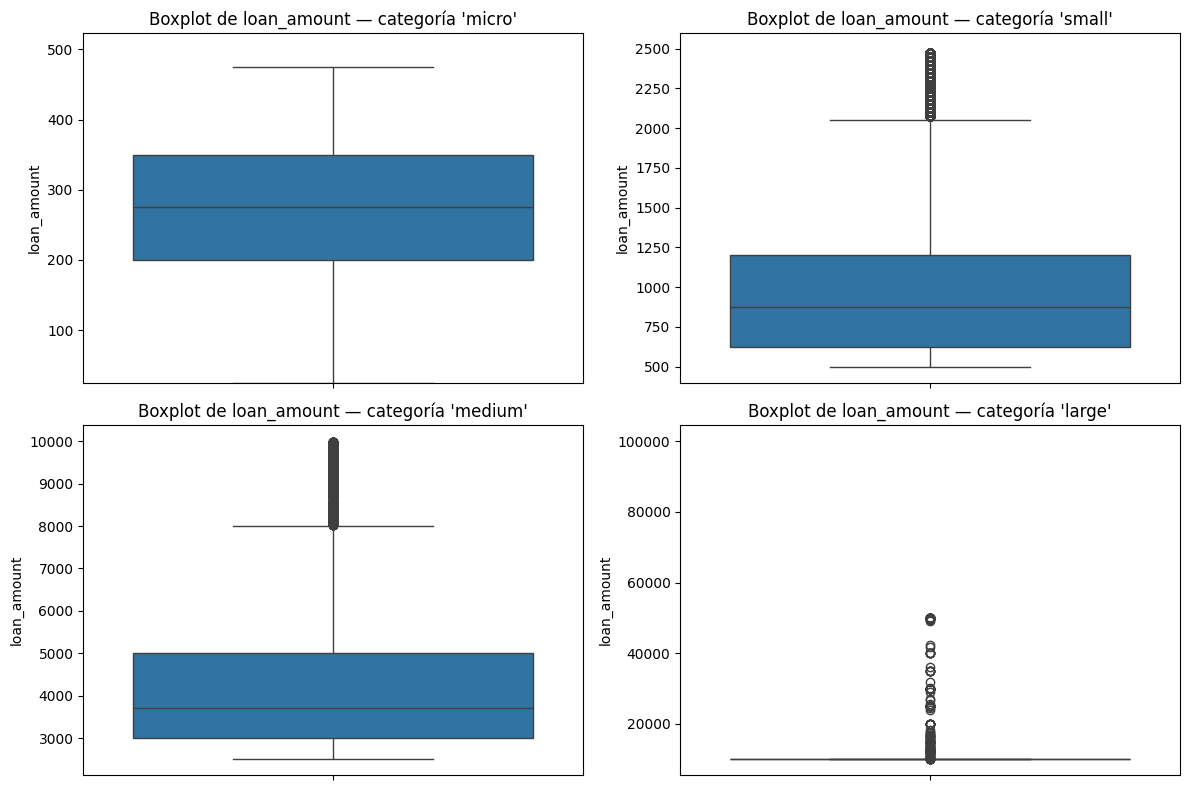

In [60]:
min_val = kiva_loans_df['loan_amount'].min()
max_val = kiva_loans_df['loan_amount'].max()

# Definir límites fijos (mismos que usaste para categorizar)
bounds = {
    'micro': (min_val, 500),
    'small': (500, 2500),
    'medium': (2500, 10000),
    'large': (10000, max_val)
}

categories = ['micro','small','medium','large']

# Preparar figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, cat in zip(axes, categories):
    # Filtrar filas que pertenecen a la categoría
    df_cat = kiva_loans_df[kiva_loans_df['loan_amount_category'] == cat]

    if df_cat.empty:
        ax.text(0.5, 0.5, f"No hay datos\npara '{cat}'", ha='center', va='center', fontsize=12)
        ax.set_title(f"'{cat}' (vacío)")
        ax.set_ylabel("loan_amount")
        # Ajustar límites al rango para mantener consistencia visual
        lower, upper = bounds[cat]
        pad = (upper - lower) * 0.05 if upper > lower else upper * 0.05
        ax.set_ylim(lower - pad, upper + pad)
        continue

    # Dibujar boxplot vertical simple
    sns.boxplot(y='loan_amount', data=df_cat, ax=ax)
    ax.set_title(f"Boxplot de loan_amount — categoría '{cat}'")
    ax.set_xlabel("")
    ax.set_ylabel("loan_amount")

    # Ajustar límites del eje Y al rango definido (con un pequeño padding)
    lower, upper = bounds[cat]
    # Si lower == upper (raro), añadir un mínimo padding basado en max_val
    if upper == lower:
        pad = max_val * 0.01
    else:
        pad = (upper - lower) * 0.05
    # Evitar límites negativos si no tiene sentido (p.e. min 0)
    y_lower = max(lower - pad, kiva_loans_df['loan_amount'].min())
    y_upper = upper + pad
    ax.set_ylim(y_lower, y_upper)

plt.tight_layout()
plt.show()